

---


## **Import libraries**

---



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold



---


## **Import Data**

---



In [56]:
df = pd.read_csv("/content/data.csv")



---


## **Displaying the first 5 rows**

---



In [57]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097




---


## **Description of the dataset**

---



In [58]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617




---


## **Checking the total number of Rows**

---



In [59]:
len(df)

16857



---


# **Checking for Null Values**

---



In [60]:
df.isnull().sum()

,0
timestamp,0
equipment_energy_consumption,844
lighting_energy,809
zone1_temperature,867
zone1_humidity,801
zone2_temperature,853
zone2_humidity,867
zone3_temperature,802
zone3_humidity,878
zone4_temperature,816




---


## **Function for Removing the Null Values and Replacing them**

---



In [61]:
def RemoveNull(name: str):
    for index, temp in df[name].items():
        if pd.isnull(temp):
            df[name] = pd.to_numeric(df[name], errors='coerce')
            df.loc[index, name] = df[name].mean()

def ReplaceNull(name: str):
  if df[name].isnull().sum():
    if pd.api.types.is_numeric_dtype(df[name]):
      df[name] = df[name].fillna(df[name].mean())
    else:
      df[name] = df[name].fillna(df[name].mode()[0])

In [62]:
for i in df.columns:
  if df[i].isnull().sum():
    ReplaceNull(i)



---


## **After Replacement of Null Values**

---



In [63]:
df.isnull().sum()

,0
timestamp,0
equipment_energy_consumption,0
lighting_energy,0
zone1_temperature,0
zone1_humidity,0
zone2_temperature,0
zone2_humidity,0
zone3_temperature,0
zone3_humidity,0
zone4_temperature,0




---


## **PLOTS**

---



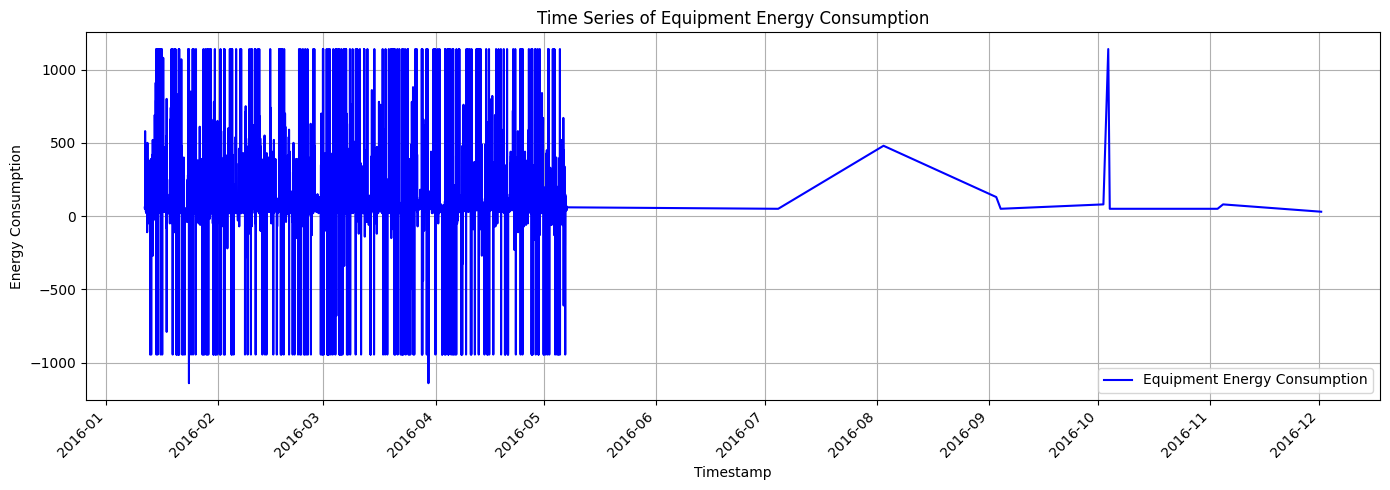

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

df['equipment_energy_consumption'] = pd.to_numeric(
    df['equipment_energy_consumption'], errors='coerce'
)
df_clean = df.dropna(subset=['timestamp', 'equipment_energy_consumption'])

df_clean = df_clean.set_index('timestamp')

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(
    df_clean.index,
    df_clean['equipment_energy_consumption'],
    label='Equipment Energy Consumption',
    color='blue'
)

ax.set_xlabel('Timestamp')
ax.set_ylabel('Energy Consumption')
ax.set_title('Time Series of Equipment Energy Consumption')
ax.legend()
ax.grid(True)

locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


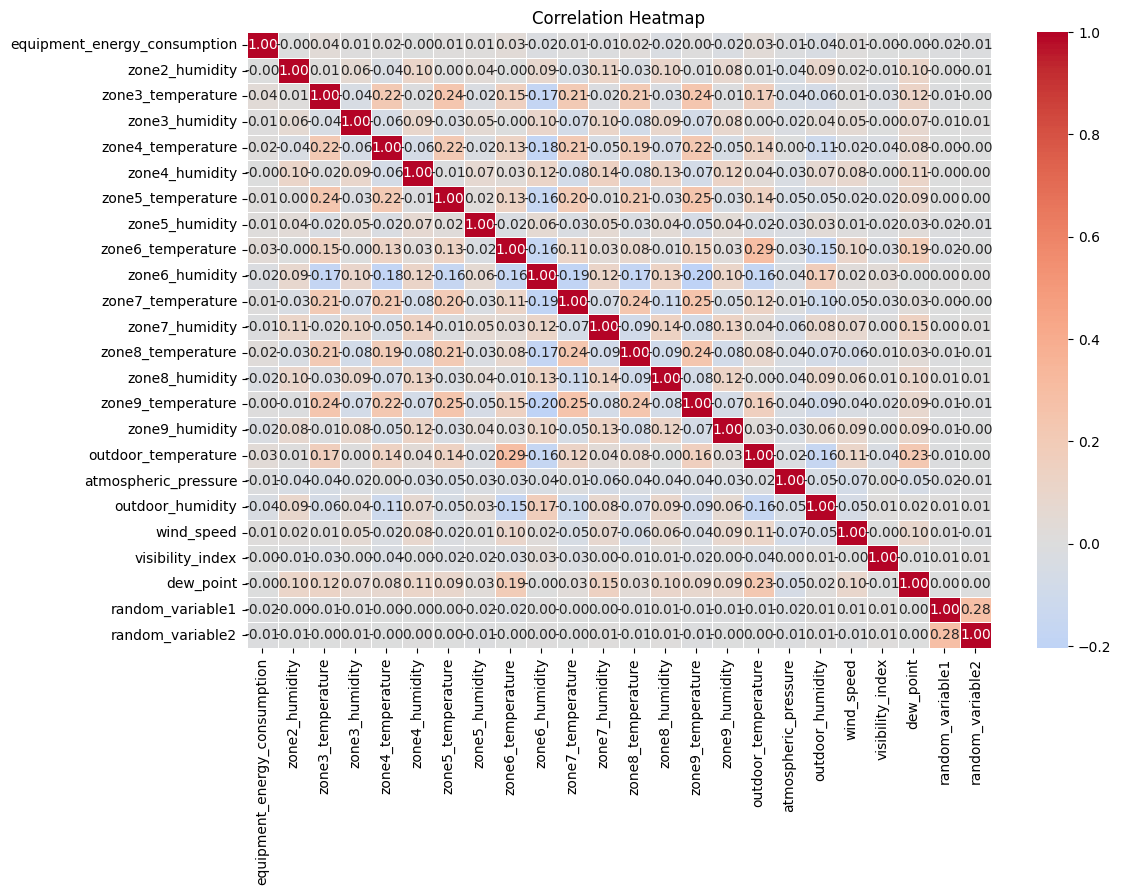

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


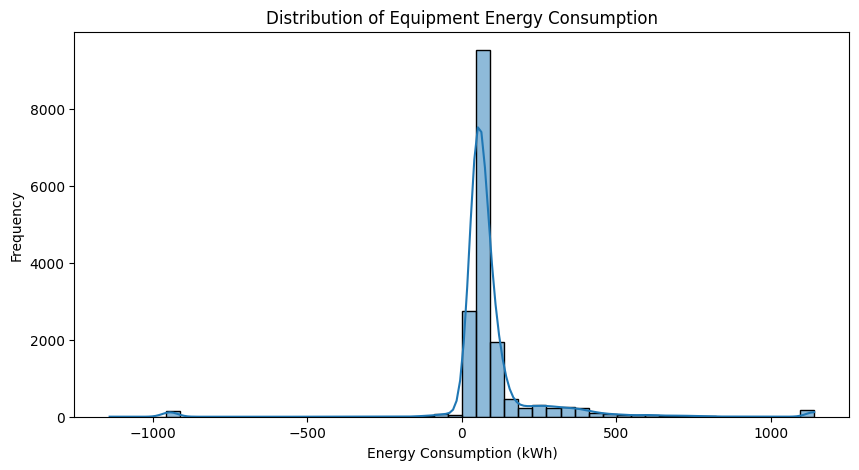

In [66]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['equipment_energy_consumption'], bins=50, kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()




---


## **Drawing a boxplot of the Equipment Energy Consumption**


---



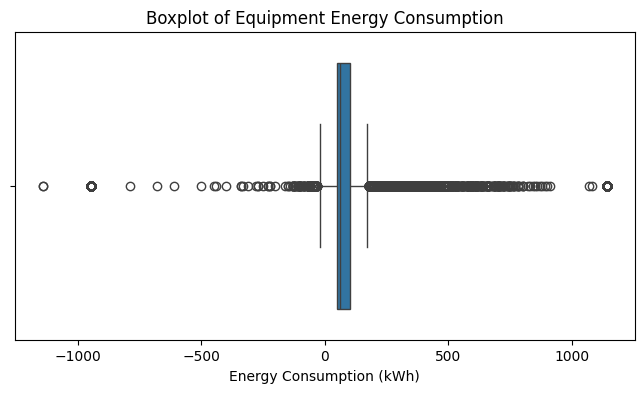

In [67]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['equipment_energy_consumption'])
plt.title('Boxplot of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.show()




---


## **Removing the Outliers**

---



In [68]:
q1 = df['equipment_energy_consumption'].quantile(0.25)
q3 = df['equipment_energy_consumption'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['equipment_energy_consumption'] >= lower_bound) & (df['equipment_energy_consumption'] <= upper_bound)]



---


## **Boxplot after removal of Outliers**

---



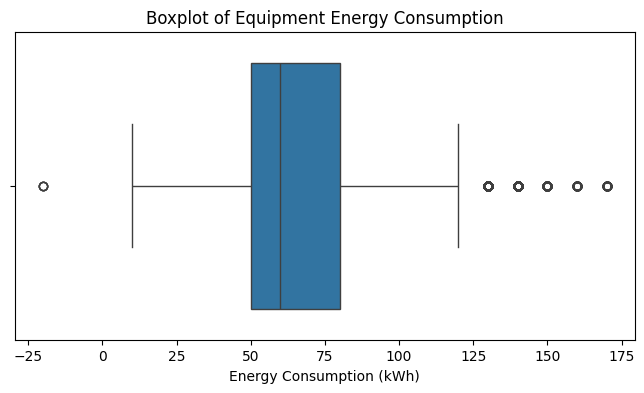

In [69]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['equipment_energy_consumption'])
plt.title('Boxplot of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.show()




---


## **Plotting the correlation heatmap**

---



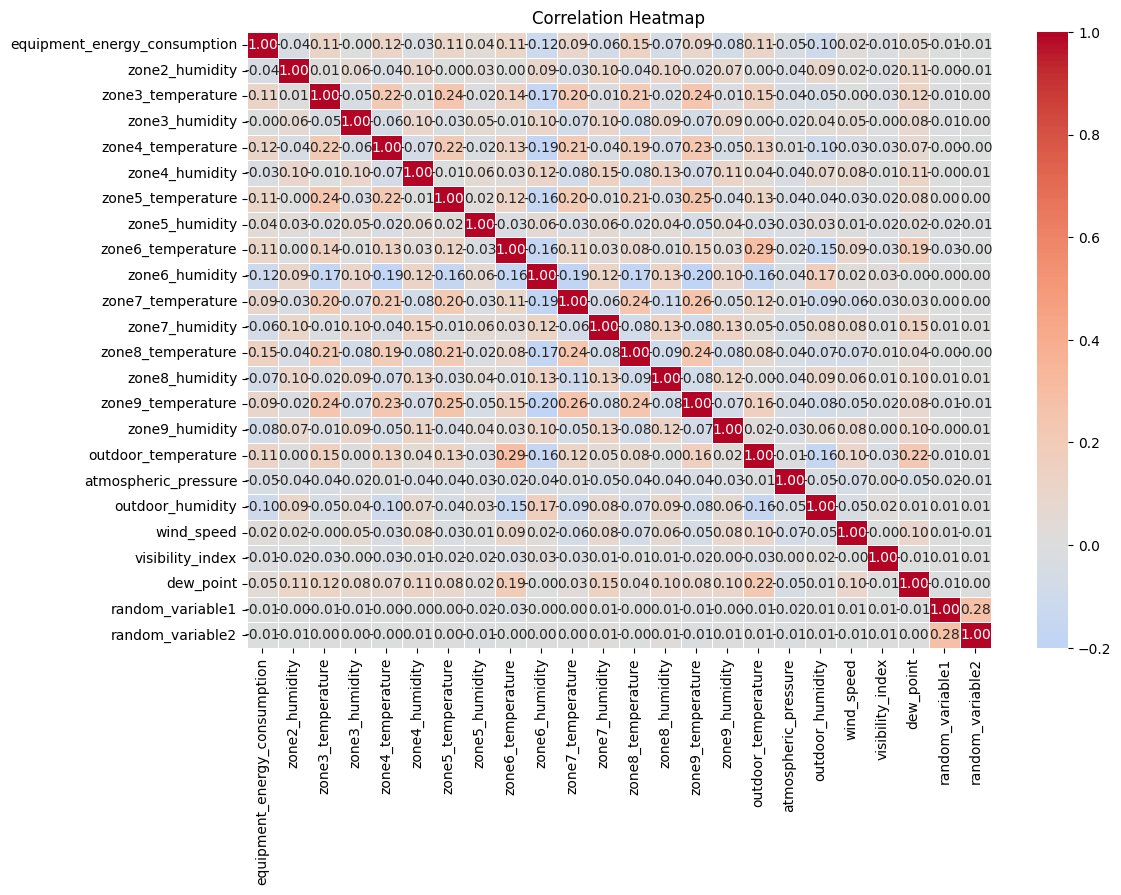

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




---


## **Plotting a pie-chart for showing the correlation strength between the other features and equipment energy consumption**

---




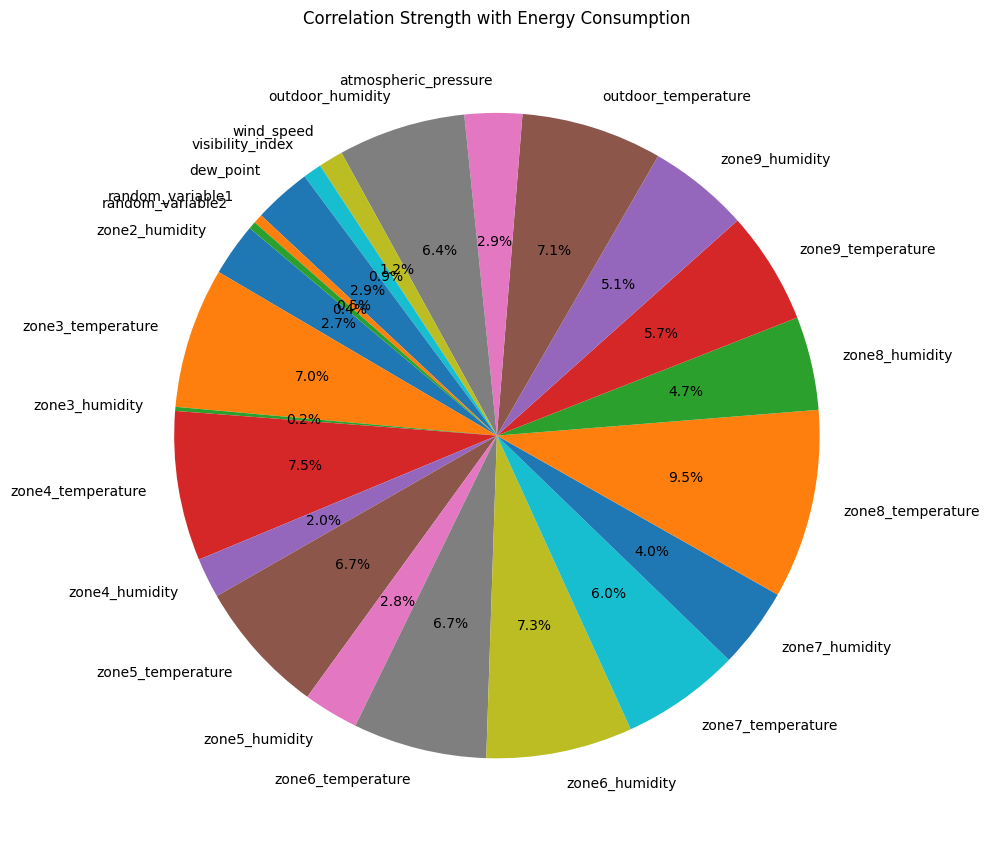

In [71]:
df_numeric = df.select_dtypes(include='number')
correlation = df_numeric.corr()['equipment_energy_consumption'].drop('equipment_energy_consumption')
abs_corr = correlation.abs()
corr_pie = abs_corr / abs_corr.sum()


plt.figure(figsize=(10, 10))
plt.pie(corr_pie, labels=corr_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Correlation Strength with Energy Consumption')
plt.tight_layout()
plt.show()




---


## **Checking for instance the correlation of lightning energy with equipment energy consumption**

---



In [72]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['random_variable1'] = pd.to_numeric(df['random_variable1'], errors='coerce')

df['equipment_energy_consumption'] = df['equipment_energy_consumption'].fillna(df['equipment_energy_consumption'].mean())
df['random_variable1'] = df['random_variable1'].fillna(df['random_variable1'].mean())

df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')

df['lighting_energy'] = df['lighting_energy'].fillna(df['lighting_energy'].mean())

df['equipment_energy_consumption'].corr(df['lighting_energy'])

np.float64(0.14557002570698666)



---


## **Checking the skewness of the column Equipment Energy Consumption**

---



Skewness: 1.1583


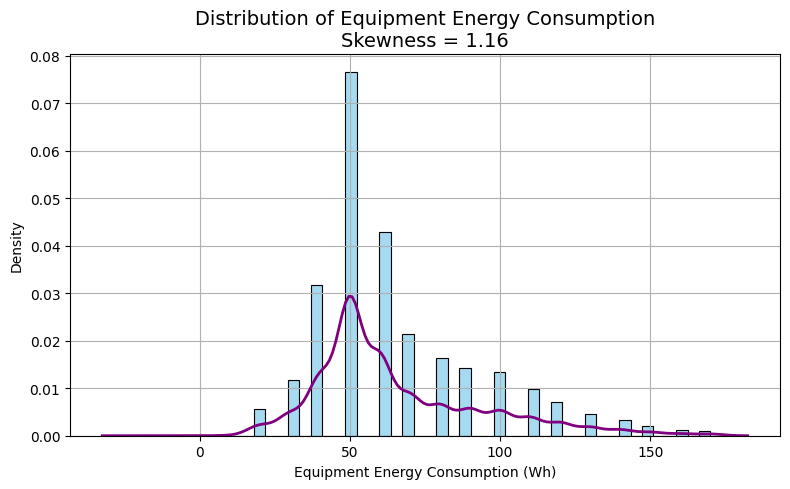

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
valid_data = df['equipment_energy_consumption'].dropna()

skew_val = valid_data.skew()
print(f"Skewness: {skew_val:.4f}")

plt.figure(figsize=(8, 5))

sns.histplot(
    valid_data,
    bins=50,
    color='skyblue',
    edgecolor='black',
    stat='density'
)

sns.kdeplot(
    valid_data,
    color='purple',
    linewidth=2
)

plt.title(f'Distribution of Equipment Energy Consumption\nSkewness = {skew_val:.2f}', fontsize=14)
plt.xlabel('Equipment Energy Consumption (Wh)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()




---


#### **Thus we can see the distribution is right skewed**

---



In [74]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df["month"] = df["timestamp"].dt.month

In [75]:
temperature = [col for col in df.columns if 'temperature' in col and 'zone' in col]
humidity = [col for col in df.columns if 'humidity' in col and 'zone' in col]

In [76]:
for col in temperature + humidity:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df["average_temperature"] = df[temperature].mean(axis=1)
df["average_humidity"] = df[humidity].mean(axis=1)



---


## **Checking the null values for average temperature**


---



In [77]:
df["average_temperature"].isnull().sum()

np.int64(0)



---


## **Checking correlation**

---



#### On calculating the correlation between the target column i.e **"equipment_energy_consumption"** and **"random_variable1"** as well as **"equipment_energy_consumption"** vs **"random_variable2"** we can see that they are **negatively correlated** so we can ignore them"

---





In [78]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['random_variable1'] = pd.to_numeric(df['random_variable1'], errors='coerce')

df['equipment_energy_consumption'] = df['equipment_energy_consumption'].fillna(df['equipment_energy_consumption'].mean())
df['random_variable1'] = df['random_variable1'].fillna(df['random_variable1'].mean())

df['equipment_energy_consumption'].corr(df['random_variable1'])

np.float64(-0.0073917793023811)

In [79]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['random_variable2'] = pd.to_numeric(df['random_variable2'], errors='coerce')

df['equipment_energy_consumption'] = df['equipment_energy_consumption'].fillna(df['equipment_energy_consumption'].mean())
df['random_variable2'] = df['random_variable2'].fillna(df['random_variable2'].mean())

df['equipment_energy_consumption'].corr(df['random_variable2'])

np.float64(-0.005925237973164299)



---


## **Upon drawing the scatterplot we find that there is no pattern in the distribution**

---






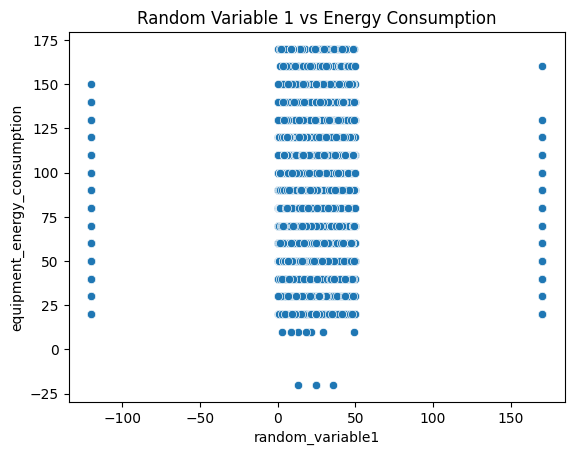

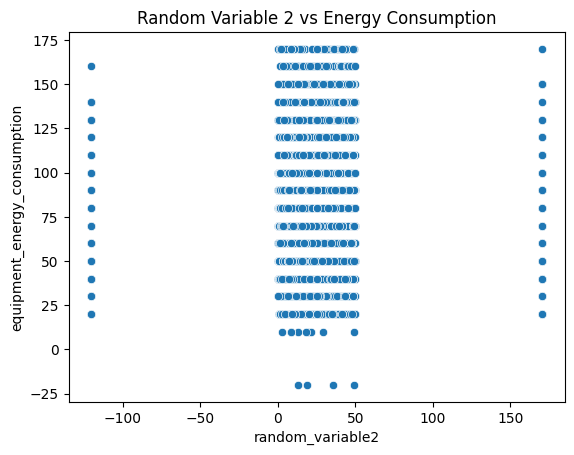

In [80]:
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=df)
plt.title('Random Variable 1 vs Energy Consumption')
plt.show()

sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=df)
plt.title('Random Variable 2 vs Energy Consumption')
plt.show()




---


## **Converted the "equipment_energy_consumption" to log format because:**

---




1.  **Reduces Skewness:**
A right-skewed distribution has a long tail on the right(many small values, few very large ones).Taking the logarithm compresses large values and stretches small ones, making the distribution more symmetric and closer to normal.

2.   **Improves Model Performance:**
Many regression models (especially linear models and tree-based models) perform better when the target variable is more normally distributed.
It helps the model better understand the relationship between inputs and output, especially when changes in the target variable are multiplicative rather than additive.

3. **Reduces Impact of Outliers:**
In raw form, large values can disproportionately influence the model.
Log transformation dampens outlier impact without completely discarding the information.

4. **Makes Errors More Interpretable:**
In log space, the model's prediction error corresponds to a relative (percentage-like) difference rather than an absolute one.




In [81]:
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].replace('unknown', np.nan)
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df.loc[df['equipment_energy_consumption'] <= 0, 'equipment_energy_consumption'] = 1e-6
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].fillna(df['equipment_energy_consumption'].mean())

df['log_energy'] = np.log1p(df['equipment_energy_consumption'])

In [82]:
X = df.drop(['equipment_energy_consumption', 'timestamp', 'random_variable1', 'random_variable2'], axis=1)
y = df['log_energy']

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



---


## **Hyperparameter Tuning and Evaluationof Random Forest for "Energy Consumption" Prediction**

---





---


## **Model After Applying RandomizedSearchCV**

---



In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'equipment_energy_consumption'
X = df.drop(columns=[target, 'timestamp', 'random_variable1', 'random_variable2'])
y = df[target]
y = np.log1p(y)

for col in X.select_dtypes('object').columns:
    X[col] = X[col].replace('unknown', np.nan)
    X[col] = X[col].fillna(X[col].mode()[0])
    X[col] = pd.to_numeric(X[col], errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

cv = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_scaled, y_train)

best_model = random_search.best_estimator_
best_score = np.sqrt(-random_search.best_score_)
best_params = random_search.best_params_

print("Best Cross-Validation RMSE:", best_score)
print("Best hyperparameters:", best_params)

y_pred = best_model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae  = mean_absolute_error(y_test, y_pred)
test_r2   = r2_score(y_test, y_pred)

results_df = pd.DataFrame({
    'Metric': ['Best CV RMSE', 'Test RMSE', 'Test MAE', 'Test R²'],
    'Score': [best_score, test_rmse, test_mae, test_r2]
})
results_df['Score'] = results_df['Score'].apply(lambda x: f"{x:.3f}")

print("\nEvaluation Metrics:")
print(results_df.to_string(index=False))

best_params_df = pd.DataFrame([best_params])
print("\nBest Hyperparameters:")
print(best_params_df.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Cross-Validation RMSE: 0.10627647251752251
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

Evaluation Metrics:
      Metric Score
Best CV RMSE 0.106
   Test RMSE 0.105
    Test MAE 0.051
     Test R² 0.938

Best Hyperparameters:
 n_estimators  min_samples_split  min_samples_leaf max_features max_depth
          200                  2                 1         sqrt      None




---


## **Comparison of Actual and Predicted Energy Consumption on Test Set for first 10 samples**

---




In [87]:
import pandas as pd
import numpy as np

y_pred_log = best_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)

y_true = np.expm1(y_test)

df_compare = pd.DataFrame({
    'Actual (Wh)':    y_true,
    'Predicted (Wh)': y_pred
}, index=y_test.index)


from IPython.display import display
display(df_compare.head(10))

,Actual (Wh),Predicted (Wh)
5818,50.0,51.233776
6870,50.0,51.508574
7950,70.0,72.622034
1605,40.0,39.850563
13630,50.0,51.693128
16243,40.0,40.035826
1881,140.0,101.159941
7134,60.0,56.879038
16547,60.0,57.200364
9998,120.0,110.835574




---


## **Plotting the histogram of the actual data**

---



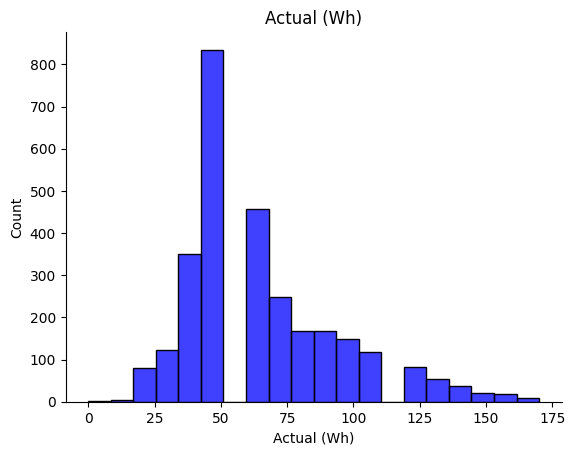

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_compare['Actual (Wh)'], bins=20, color='blue')
plt.title('Actual (Wh)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



---


## **Plotting the histogram for the predicted data**

---



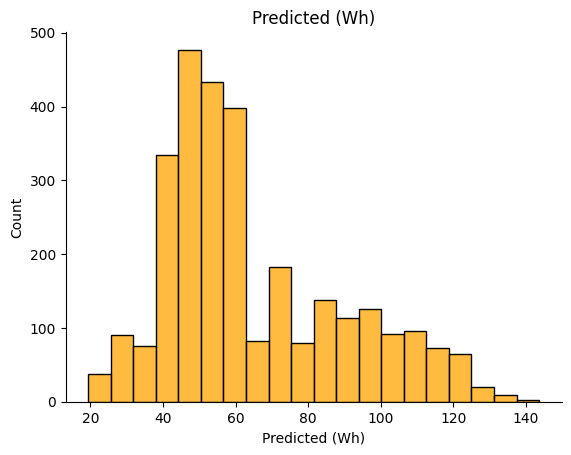

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(df_compare['Predicted (Wh)'], bins=20, color='orange')
plt.title('Predicted (Wh)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()




---


## **Plotting the overlap of both the actual and predicted data**

---



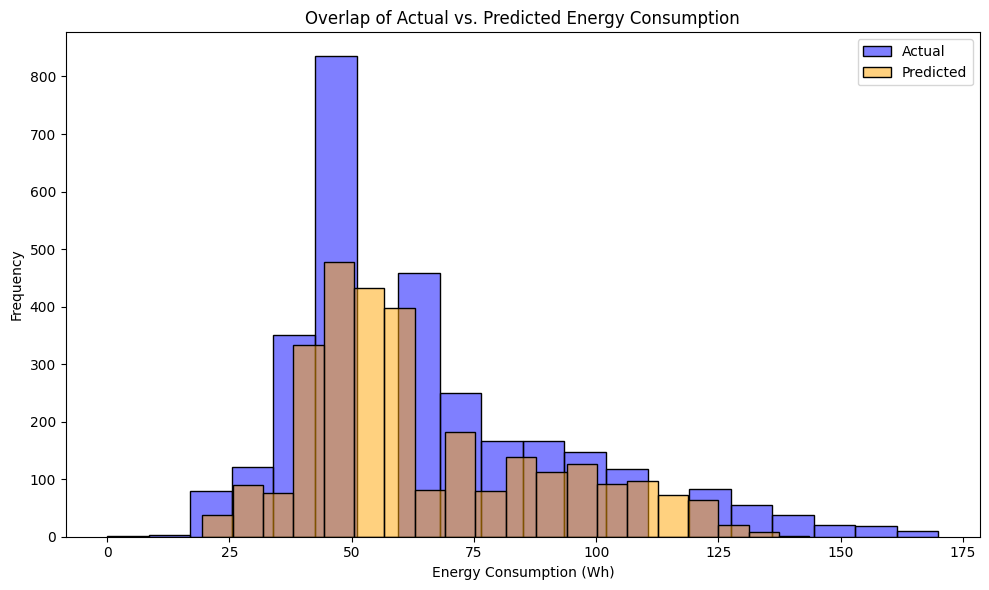

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_compare['Actual (Wh)'], label='Actual', bins=20, alpha=0.5, color='blue')
sns.histplot(df_compare['Predicted (Wh)'], label='Predicted', bins=20, alpha=0.5, color='orange')
plt.title('Overlap of Actual vs. Predicted Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()



---


## **Plotting the actual vs predicted energy consumption**


---



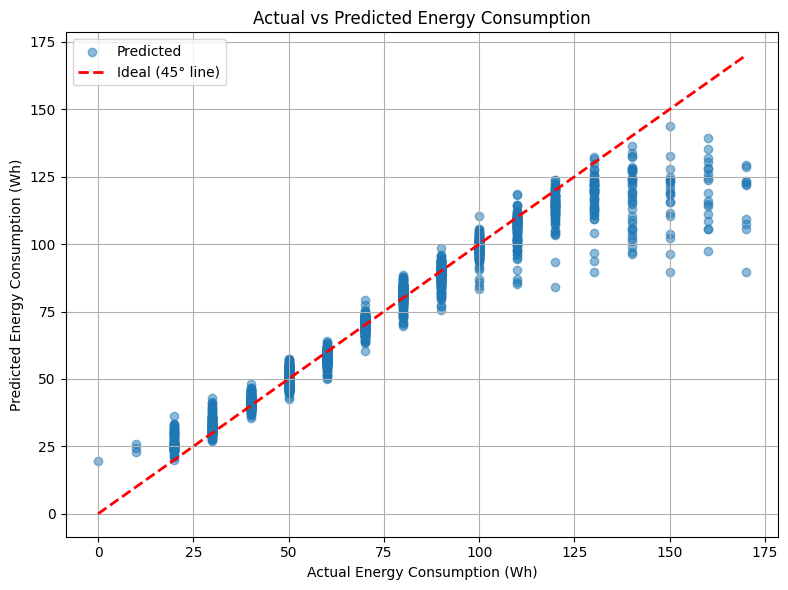

In [91]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_log = best_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', lw=2, label='Ideal (45° line)')
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---


## **Plotting the Graph of Residual distribution**

1.   **X-axis (Residual (Wh)):**
The difference between actual and predicted energy consumption in watt-hours (Wh).


*   A value of 0 means **perfect prediction.**
*   **Negative values** mean the model overpredicted.
*   **Positive values** mean it underpredicted.

2.   **Y-axis (Density):**
The normalized frequency (how often residuals of a particular value occur).

*   **Blue bars:**
Histogram showing how residuals are distributed.
*   **Red dashed line at 0:**
The ideal scenario where prediction error is zero.



---



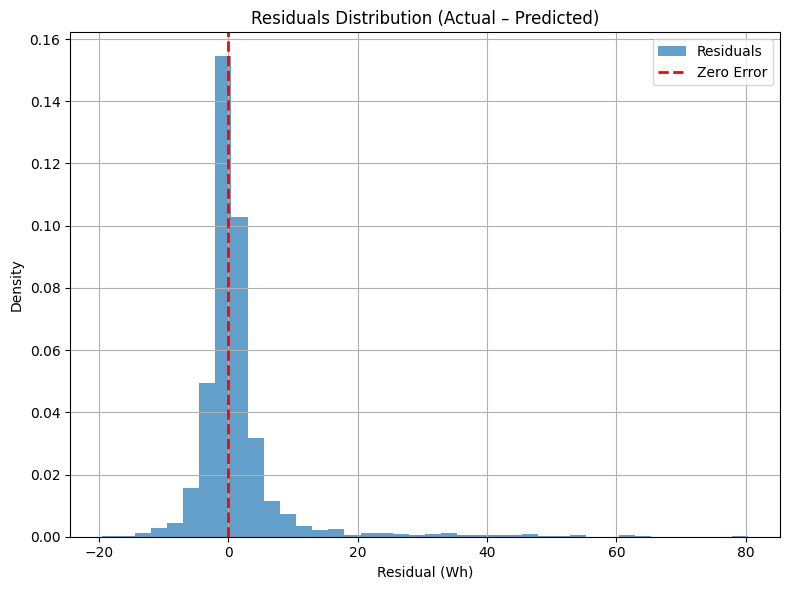

In [92]:
residuals = y_true - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=40, density=True, alpha=0.7, label='Residuals')
plt.axvline(0, color='r', linestyle='--', lw=2, label='Zero Error')
plt.title('Residuals Distribution (Actual – Predicted)')
plt.xlabel('Residual (Wh)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---


## **Distribution of Actual vs Predicted Energy Consumption**
---



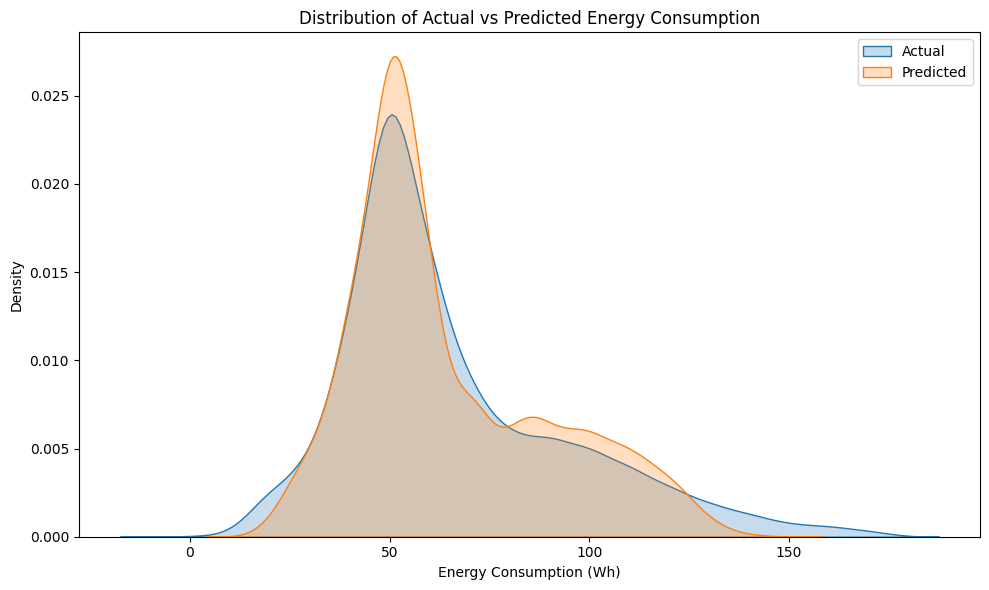

In [93]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_true, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.title('Distribution of Actual vs Predicted Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [94]:
import numpy as np
n = len(y_true)

mu_act, sigma_act = y_true.mean(), y_true.std(ddof=1)
se_act = sigma_act / np.sqrt(n)
ci_act = (mu_act - 1.96*se_act, mu_act + 1.96*se_act)

mu_pred, sigma_pred = y_pred.mean(), y_pred.std(ddof=1)
se_pred = sigma_pred / np.sqrt(n)
ci_pred = (mu_pred - 1.96*se_pred, mu_pred + 1.96*se_pred)

emp_act = (np.percentile(y_true, 2.5), np.percentile(y_true, 97.5))
emp_pred = (np.percentile(y_pred, 2.5), np.percentile(y_pred, 97.5))

print("Actual mean 95% CI:", np.round(ci_act,3))
print("Pred mean 95% CI:", np.round(ci_pred,3))
print("Actual 95% data interval:", np.round(emp_act,3))
print("Pred 95% data interval:", np.round(emp_pred,3))


Actual mean 95% CI: [64.728 66.819]
Pred mean 95% CI: [63.556 65.349]
Actual 95% data interval: [ 20. 140.]
Pred 95% data interval: [ 29.167 120.424]


In [95]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_imp, y_train)

all_preds = np.stack([tree.predict(X_test_imp) for tree in rf.estimators_], axis=1)

q05 = np.quantile(all_preds, 0.05, axis=1)
q50 = np.quantile(all_preds, 0.50, axis=1)
q95 = np.quantile(all_preds, 0.95, axis=1)




---


## **Getting the pinball loss for 3 levels of significance(alpha)**

---



In [96]:
import numpy as np
from sklearn.metrics import mean_pinball_loss

pinball_05 = mean_pinball_loss(y_test, q05, alpha=0.05)
pinball_50 = mean_pinball_loss(y_test, q50, alpha=0.50)
pinball_95 = mean_pinball_loss(y_test, q95, alpha=0.95)

inside = (y_test >= q05) & (y_test <= q95)
coverage = inside.mean()

avg_width = np.mean(q95 - q05)

print(f"Pinball loss @ 5%:   {pinball_05:.4f}")
print(f"Pinball loss @ 50%:  {pinball_50:.4f}  (i.e. MAE)")
print(f"Pinball loss @ 95%:  {pinball_95:.4f}")
print(f"Empirical coverage:  {coverage:.3%}")
print(f"Mean interval width: {avg_width:.2f} Wh")


Pinball loss @ 5%:   0.0103
Pinball loss @ 50%:  0.0189  (i.e. MAE)
Pinball loss @ 95%:  0.0107
Empirical coverage:  47.502%
Mean interval width: 0.07 Wh




---


## **Extracting the dates for the peak electricity consumption**

---



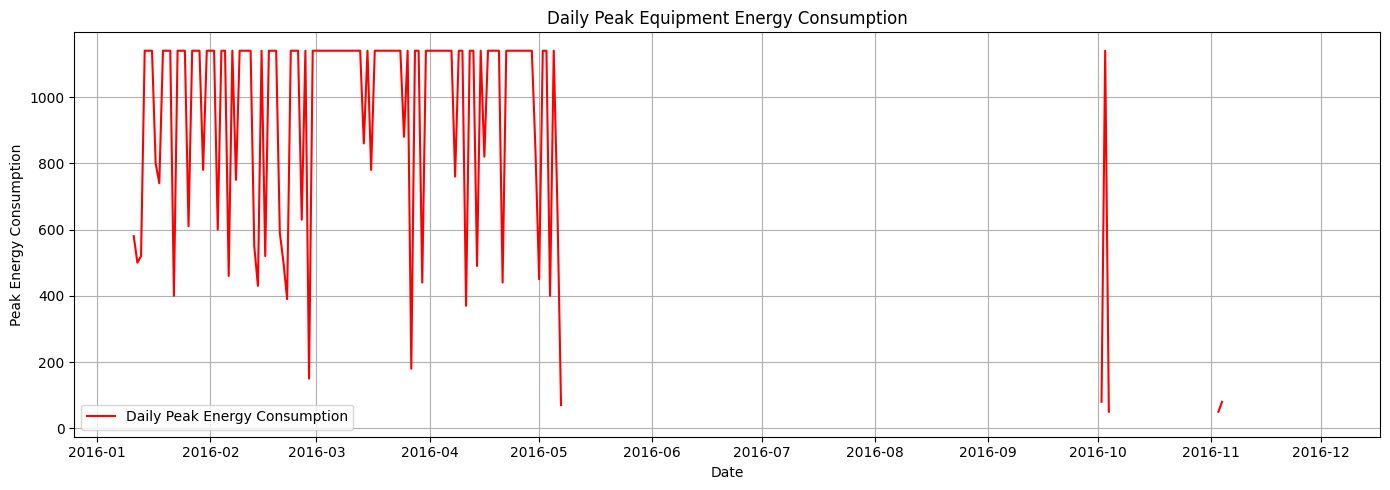

In [97]:
import matplotlib.pyplot as plt
daily_peaks = df_clean['equipment_energy_consumption'].resample('D').max()

plt.figure(figsize=(14, 5))
plt.plot(daily_peaks.index, daily_peaks.values, label='Daily Peak Energy Consumption', color='red')
plt.xlabel('Date')
plt.ylabel('Peak Energy Consumption')
plt.title('Daily Peak Equipment Energy Consumption')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()